In [21]:
from qiskit.compiler import transpile
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.quantum_info import Operator
import numpy as np



theta = Parameter("x")



qc = QuantumCircuit(2)
qc.h(0)
qc.rx(np.pi/2, 1) 
qc.cx(0,1)
qc.rz(2*np.pi, 1)
qc.cx(0,1)
qc.h(0)
qc.rx(np.pi/2, 1)



qc.draw()

Rxy = Operator(qc)

In [22]:
from qiskit.visualization import array_to_latex

array_to_latex(Rxy.to_matrix())

<IPython.core.display.Latex object>

In [11]:
basis_gates = ['h', 'cx']
qc_trans = transpile(qc, basis_gates=basis_gates)
qc_trans.draw()

TranspilerError: "Unable to translate the operations in the circuit: ['x', 'h'] to the backend's (or manually specified) target basis: ['barrier', 'delay', 'snapshot', 'reset', 'h', 'measure', 'cx']. This likely means the target basis is not universal or there are additional equivalence rules needed in the EquivalenceLibrary being used. For more details on this error see: https://qiskit.org/documentation/stubs/qiskit.transpiler.passes.BasisTranslator.html#translation_errors"

In [93]:
from qiskit_experiments.library import StateTomography
from qiskit.circuit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeGuadalupe
from qiskit_aer.noise import NoiseModel
from qiskit.quantum_info import DensityMatrix


shots = 1
backend = AerSimulator(method="statevector")
print(backend.status())

qc = QuantumCircuit(2)
qc.h(0)
experiment = StateTomography(qc)
data = experiment.run(backend).block_for_results()

In [94]:
data.analysis_results("state_fidelity")

AnalysisResult(name=state_fidelity, value=0.9886820253919013, device_components=[<Qubit(Q0)>, <Qubit(Q1)>], experiment_id=a63d10ac-19ba-4b01-8a2a-781d0e85f6f6, result_id=ec007e51-ef6f-4640-86d0-4ebfd36d7ee4, chisq=None, quality=unknown, verified=False, extra={'trace': None, 'eigvals': None, 'raw_eigvals': None, 'rescaled_psd': None, 'fitter_metadata': None, 'conditional_probability': None, 'positive': None, 'experiment': 'StateTomography', 'run_time': None}, tags=[], experiment id='a63d10ac-19ba-4b01-8a2a-781d0e85f6f6')

In [35]:
import numpy as np
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import PauliTwoDesign
from qiskit.opflow import Z
 
ansatz = PauliTwoDesign(2, reps=1, seed=2)
observable = Z ^ Z
initial_point = np.random.random(2)
 
def loss(x, a):
    z = a + x[0]**2 + x[1]**2
    return z

spsa = SPSA(maxiter=300)
a = 2
result = spsa.minimize(loss, initial_point, jac=a)
print(result)

TypeError: loss() missing 1 required positional argument: 'a'

In [4]:
import numpy as np
import scipy



from scipy.optimize import minimize
from qiskit.quantum_info import SparsePauliOp, Statevector, DensityMatrix, partial_trace, state_fidelity
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.primitives import Sampler
from qiskit_experiments.library import StateTomography

from library import plotting
from library import state_label
from library.ansatz_creation import two_local
from library.operator_creation import LMG_hamiltonian
from library.QMETTS import QMETTS_instance

In [29]:
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeGuadalupe
from qiskit_aer.noise import NoiseModel


fake_backend = FakeGuadalupe()
noise_model = NoiseModel.from_backend(fake_backend)
backend = AerSimulator(method="density_matrix", noise_model=noise_model, shots=2089)

backend.status()

In [19]:
import numpy as np
from qiskit.quantum_info import Statevector
from library.operator_creation import LMG_hamiltonian


B_list = [0.1, 0.4, 0.7, 1., 1.2]

pm_state_list = [Statevector([ 0.99791277+0.j, -0.00947531+0.j, -0.01884578+0.j,
              0.06103414+0.j]), Statevector([ 9.98088109e-01+0.j, -3.97526621e-04+0.j, -7.84204092e-04+0.j,
              6.18009182e-02+0.j]), Statevector([ 9.99364498e-01+0.j, -1.48692664e-05+0.j, -3.26493202e-05+0.j,
              3.56454626e-02+0.j]), Statevector([ 9.99688036e-01+0.j, -5.14060828e-07+0.j, -1.32334742e-06+0.j,
              2.49765988e-02+0.j]), Statevector([ 9.99783245e-01+0.j, -5.23486186e-08+0.j, -1.54593296e-07+0.j,
              2.08197851e-02+0.j])]

pp_state_list = [Statevector([0.02726132+0.j, 0.70681949+0.j, 0.70681949+0.j,
             0.00832047+0.j]), Statevector([0.4240404 +0.j, 0.64011183+0.j, 0.64011237+0.j,
             0.02650931+0.j]), Statevector([0.99348546+0.j, 0.07658334+0.j, 0.07658563+0.j,
             0.03544396+0.j]), Statevector([0.9996737 +0.j, 0.00378721+0.j, 0.00378722+0.j,
             0.02497634+0.j]), Statevector([9.99782994e-01+0.j, 5.00950519e-04+0.j, 5.00951143e-04+0.j,
             2.08197831e-02+0.j])]

N = 2
gy = 0.8
B_class = np.linspace(0., 1.3, 100)
first_state_energy = []
ground_state_energy = []
for B in B_class:
    H = LMG_hamiltonian(N, gy, B)
    ground_state_energy.append(H.get_ground_state()[0])
    first_state_energy.append(H.diagonalize(H.get_matrix())[0][1])
    
pm_e = []
pp_e = []
for index in range(len(B_list)):
    H = LMG_hamiltonian(N, gy, B_list[index])
    pm_e.append(pm_state_list[index].inner(pm_state_list[index].evolve(H.get_pauli())))
    pp_e.append(pp_state_list[index].inner(pp_state_list[index].evolve(H.get_pauli())))

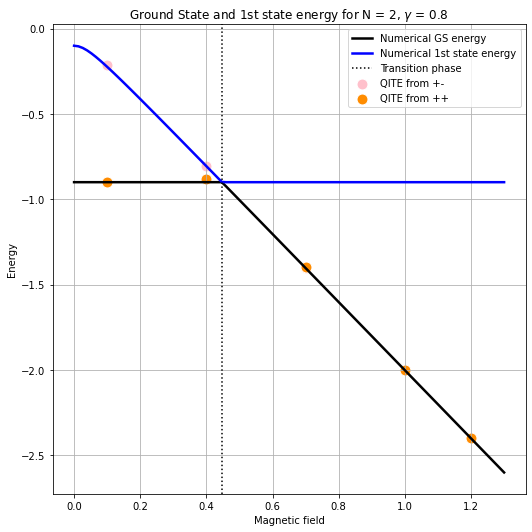

In [28]:
import matplotlib.pyplot as plt



plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True


plt.title("Ground State and 1st state energy for N = {}, $\gamma$ = {}".format(N, gy))


plt.plot(B_class, ground_state_energy, color="black", lw=2.5, label = "Numerical GS energy")
plt.plot(B_class, first_state_energy, color="blue", lw=2.5, label="Numerical 1st state energy")
plt.axvline(0.5*np.sqrt(gy), color='black', linestyle='dotted', label = "Transition phase")

    
plt.scatter(B_list, pm_e,color="pink",edgecolor="white",marker='o',s=120, label = "QITE from +-")
plt.scatter(B_list, pp_e,color="darkorange",edgecolor="white",marker='o',s=120, label = "QITE from ++")


plt.ylabel('Energy')
plt.xlabel('Magnetic field')


# Line of codes to avoid repeating labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.grid()
plt.show()

# Variational Gibbs State Preparation on NISQ devices - Consiglio algorithm

In [ ]:
N = 2
gy = 0.5
B = 0.2


sampler = Sampler()
LMG = LMG_hamiltonian(N, gy, B)
H = SparsePauliOp(["XX"], coeffs=[1.0])
ansatz = two_local(num_qubits=N, num_reps=1)
ansatz.bind_parameters([0.0, 0.0, 0.0, 0.0])
eigen = LMG.diagonalize(H)
eigenvalues = eigen[0]
U = np.matrix(eigen[1]).getH()
circuit = ansatz.build()

new_qc = ansatz.build()
new_qc.unitary(U, new_qc.qubits)
new_qc.measure_all()
job = sampler.run(new_qc, shots=5000)
print(state_label.exp_value(circuit, H))
print(eigenvalues, eigen[1])
for key in job.result().quasi_dists[0].keys():
    print(type(key))
    print(job.result().quasi_dists[0][key])
print(new_qc.num_qubits)

In [ ]:
N = 2
H = SparsePauliOp(["X"], 1.0)

qc = QuantumCircuit(N)
qc.h(0)
qc.cx(0,1)
qc.h(1)
qc.measure_all()
print(qc.draw())

job = sampler.run(qc, shots=10000)
prob_dict = job.result().quasi_dists[0]
print(prob_dict)


new_qc = QuantumCircuit(N)
new_qc.h(0)
new_qc.cx(0,1)
#print(new_qc.decompose().draw())
#rho = DensityMatrix(qc)
#print(rho.probabilities([0]))
#print(partial_trace(rho, [0]))
#print(rho.expectation_value(H, [1]))

In [ ]:
def cost(parameter_list, ancilla_ansatz, system_ansatz, observable, beta):
    ancilla_parameter = []
    system_parameter = []
    for index in range(int(len(parameter_list)/2)):
        ancilla_parameter.append(parameter_list[index])
        system_parameter.append(parameter_list[index + int(len(parameter_list)/2)])
        
    ancilla_ansatz.bind_parameters(ancilla_parameter)
    system_ansatz.bind_parameters(system_parameter)
    print("ancilla_parameter", ancilla_parameter)
    print("system_parameter", system_parameter)
    
    ancilla_qc = ancilla_ansatz.build()
    system_qc = system_ansatz.build()
    
    
    N_ancilla = ancilla_qc.num_qubits
    N_system = system_qc.num_qubits
    LMG = LMG_hamiltonian(N_system, 0.0, 1.0)
    eigen = LMG.diagonalize(observable)

    total_qc = QuantumCircuit(N_ancilla + N_system)
    total_qc.append(ancilla_qc, range(0, N_ancilla))
    for qbit in range(0, N_system):
        total_qc.cx(qbit, qbit+N_system)
    total_qc.append(system_qc, range(N_ancilla, N_ancilla + N_system))
    #print(total_qc.decompose().draw())
    
    rho = DensityMatrix(total_qc)
    rho_tom = StateTomography(total_qc)
    prob_ancilla = rho.probabilities(range(0, N_ancilla))
    entropy = 0.0
    for index in range(len(prob_ancilla)):
        if prob_ancilla[index] != 0.0:
            entropy -= prob_ancilla[index]*np.log(prob_ancilla[index])
    system_exp_value = rho.expectation_value(observable, range(N_ancilla, N_ancilla+N_system))
    
    if(np.imag(system_exp_value) != 0.0):
        print("Exp_value Imag")
        
    print("current F =", np.real(beta*system_exp_value - entropy))    
    return np.real(beta*system_exp_value - entropy)

N = 2
gy = 0.2
B = 0.8
beta = 0.3
ancilla_ansatz = two_local(num_qubits=N, num_reps=1)
system_ansatz = two_local(num_qubits=N, num_reps=1, par_name="y")
parameter_list = np.zeros(8)

H = LMG_hamiltonian(N, gy, B)
cost(parameter_list, ancilla_ansatz, system_ansatz, H.get_pauli(), beta)

In [ ]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()

In [ ]:
backend_service = provider.backend

In [ ]:
provider.backends()

In [ ]:
simulator_backend = provider.get_backend("simulator_statevector")

In [ ]:
N = 2
gy = 0.2
B = 0.8
beta = 0.3
ancilla_ansatz = two_local(num_qubits=N, num_reps=1)
system_ansatz = two_local(num_qubits=N, num_reps=1, par_name="y")
parameter_list = np.zeros(8)

ancilla_ansatz.bind_parameters(np.zeros(4))
rho_tom = StateTomography(ancilla_ansatz.build())

In [ ]:
data = rho_tom.run(simulator_backend).block_for_results()

In [ ]:
from qiskit.visualization import array_to_latex

state_result = data.analysis_results("state")
fid = data.analysis_results("state_fidelity")
array_to_latex(state_result.value)

In [ ]:
state_result.value

In [ ]:
print(fid)
print(state_fidelity(rho, state_result.value))
print("")
print(data.analysis_results()[0])
#rho.draw("latex")

In [ ]:
result = minimize(cost, parameter_list, args=(ancilla_ansatz, system_ansatz, H.get_pauli(), beta), method="COBYLA")
result

In [ ]:
def compose_total_qc(parameter_list, ancilla_ansatz, system_ansatz):
    ancilla_parameter = []
    system_parameter = []
    for index in range(int(len(parameter_list)/2)):
        ancilla_parameter.append(parameter_list[index])
        system_parameter.append(parameter_list[index + int(len(parameter_list)/2)])
        
    ancilla_ansatz.bind_parameters(ancilla_parameter)
    system_ansatz.bind_parameters(system_parameter)
    ancilla_qc = ancilla_ansatz.build()
    system_qc = system_ansatz.build()
    
    
    N_ancilla = ancilla_qc.num_qubits
    N_system = system_qc.num_qubits
    total_qc = QuantumCircuit(N_ancilla + N_system)
    total_qc.append(ancilla_qc, range(0, N_ancilla))
    for qbit in range(0, N_system):
        total_qc.cx(qbit, qbit+N_system)
    total_qc.append(system_qc, range(N_ancilla, N_ancilla + N_system))
    print(total_qc.decompose().draw())
    
    final_rho = DensityMatrix(total_qc)
    
    return final_rho

In [ ]:
ancilla_ansatz = two_local(num_qubits=2, num_reps=1, entanglement="all")
ancilla_ansatz.build().draw()

In [ ]:
N = 2
gy = 0.2
B = 0.8
H = LMG_hamiltonian(N, gy, B)

x = np.linspace(0.2, 0.5, 4)
x2 = np.linspace(0.2, 0.5, 100)
y1 = []
y2 = []
for beta in x:
    parameter_list = np.zeros(8)

    ancilla_ansatz = two_local(num_qubits=N, num_reps=1, entanglement="linear")
    system_ansatz = two_local(num_qubits=N, num_reps=1, par_name="y", entanglement="linear")

    result = minimize(cost, parameter_list, args=(ancilla_ansatz, system_ansatz, H.get_pauli(), beta), method="COBYLA")
    
    CONS = compose_total_qc(result.x, ancilla_ansatz, system_ansatz).expectation_value(H.get_pauli(), [2,3])
    print(CONS)
    print(H.thermal_average(H.get_pauli(), beta))
    print(result)
    y1.append(CONS)
    
for beta in x2:
    y2.append(H.thermal_average(H.get_pauli(), beta))

import matplotlib.pyplot as plt

plt.scatter(x,
    y1,
    color="black",
    ls="dotted",
    label="Qiskit")
plt.plot(x2,
    y2,
    color="red",
    ls="dotted",
    label="Numpy")
plt.show()

In [ ]:
H.get_thermal_state(beta)

In [ ]:
rho = compose_total_qc(result.x, ancilla_ansatz, system_ansatz)
state_fidelity(partial_trace(rho, range(N)), H.get_thermal_state(beta))

In [ ]:
x = np.linspace(0.8, 3.0, 3)
x2 = np.linspace(0.2, 5.0, 100)


N = 5
gy = 0.4
B = 0.9
H = LMG_hamiltonian(N, gy, B)
ground_state_energy = []
num_th_averages = []
for beta in x2:
    ground_state_energy.append(H.get_ground_state()[0])

plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

gylabel = "$\gamma$ = {gy:.1f}, B = {B:.1f} - ground state energy"

plt.title("Energy thermal averages for N = {N:.0f} spins - Consiglio".format(N=N))

plt.plot(
    x2,
    ground_state_energy,
    color="black",
    ls="dotted",
    label=gylabel.format(gy=gy, B=B),
)
plt.plot(x2, y2, color="blue", label="numerical average")
plt.scatter(
    x,
    y1,
    color="red",
    label="Consiglio average v1.0",
)

plt.ylabel("Thermal averages")
plt.xlabel("beta")

# Line of codes to avoid repeating labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.grid()
plt.show()

In [ ]:
def cost_function(ancilla_qc, system_qc, observable, beta, sampler=Sampler(), shots = 4096):
    N_ancilla = ancilla_qc.num_qubits
    N_system = system_qc.num_qubits
    LMG = LMG_hamiltonian(N_system, 0.0, 1.0)
    eigen = LMG.diagonalize(observable)
    eigenvalues = eigen[0]
    U = np.matrix(eigen[1]).getH()
    
    total_qc = QuantumCircuit(N_ancilla + N_system)
    total_qc.append(ancilla_qc, range(0, N_ancilla))
    for qbit in range(0, N_system):
        total_qc.cx(qbit, qbit+N_system)
    total_qc.append(system_qc, range(N_ancilla, N_ancilla + N_system))
    total_qc.unitary(U, range(N_ancilla, N_ancilla + N_system))
    total_qc.measure_all()
    job = sampler.run(total_qc, shots=shots)
    prob_dict = job.result().quasi_dists[0]
    print(ancilla_qc.draw())
    print(system_qc.draw())
    print(total_qc.decompose().draw())
    print(prob_dict)
    print(eigenvalues)
    exp_value = 0.0
    entropy = 0.0
    for key in job.result().quasi_dists[0].keys():
        if(key >= 2**N_ancilla):
            exp_value += eigenvalues[key-2**N_ancilla]*prob_dict[key]
        else:
            entropy -= prob_dict[key]*np.log(prob_dict[key])
    return beta*exp_value - entropy

N = 1
ansatz = two_local(num_qubits=N, num_reps=1)
ansatz.bind_parameters(np.zeros(ansatz.get_num_parameters()))
qc = QuantumCircuit(1)
qc.h(0)
new_qc = ansatz.build()
H = SparsePauliOp(["X", "Y", "Z"], coeffs=[1.0, -0.5, 0.3])
cost_function(ancilla_qc = qc, system_qc = new_qc, observable = H, beta = 0.5, shots = 20000000000)

In [ ]:
def cost_function(parameter_list, H, N):
    ansatz = two_local(num_qubits=N, num_reps=1)
    ansatz.bind_parameters(parameter_list)
    circuit = ansatz.build()
    
    return state_label.exp_value(circuit, H)

parameter_list = np.array([0.0, 0.0])
result = minimize(cost_function, parameter_list, args=(H, N), method="SLSQP")

ansatz.bind_parameters(result.x)
Statevector([1.0, 0.0]).evolve(ansatz.build())

In [ ]:
def cost_func(coeffs_list, pauli_list, H, tau, initial_state):
    A = SparsePauliOp(pauli_list, coeffs_list).to_matrix()
    U = scipy.linalg.expm(-1j*A*tau)
    C = U - np.eye(2**N) + 1j*A

    phi = np.matmul(C, initial_state)
    
    return np.linalg.norm(phi)

def get_pauli_list(N):
    basis = ["I", "X", "Y", "Z"]
    pauli_list = []
    for i in range(len(basis)):
        for j in range(len(basis)):
            pauli_list.append(basis[i]+basis[j])
            
    return pauli_list

In [ ]:
# SciPy minimizer routine
N = 2
pauli_list = get_pauli_list(N)
coeffs_list = np.ones(4**N)
tau = 0.01
initial_state = np.array([0.5, 0.5, 0.5, 0.5])
H = SparsePauliOp(["IX"], coeffs=[1.0]).to_matrix()

result = minimize(cost_func, coeffs_list, args=(pauli_list, H, tau, initial_state), method="SLSQP")

result

In [ ]:
from library import plotting
from library.ansatz_creation import two_local
from library.operator_creation import LMG_hamiltonian
from library.QMETTS import QMETTS_instance


N = 2
gy = 0.5
B = 0.2
final_beta = 0.8
num_beta_points = 3
shots = 1024
initial_state = "++"
H = LMG_hamiltonian(N, gy, B)
operators = ["xx", "zz"]
flag = "manual"
ansatz = two_local(num_qubits=N, num_reps=2)
qmetts_instance = QMETTS_instance(
    H, operators, flag, final_beta, num_beta_points, shots, initial_state, ansatz,
)
print(qmetts_instance.get_basis_list())
print(qmetts_instance.get_basis_measure_list())
QMETTS_result = qmetts_instance.multi_beta_qmetts(
    op=H.get_pauli(), initial_state=initial_state, shots=shots
)
plotting.plot_thermal_average(QMETTS_result)
plotting.plot_state_histogram(QMETTS_result)
# plotting.plot_qite(QMETTS_result)

In [ ]:
new_prep_list = {}

for label_key in QMETTS_result.preparation_result.keys():
#    print(label_key)
    new_data_list = {}
    for data_key in QMETTS_result.preparation_result[label_key].keys():
#        print(data_key)
        if data_key != "circuit_list":
            new_data_list[data_key] = QMETTS_result.preparation_result[label_key][data_key]
    new_prep_list[label_key] = new_data_list
# new_prep_list

In [ ]:
import pickle

with open('prova.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(QMETTS_result.preparation_result, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('prova.pickle', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    data = pickle.load(f)

In [ ]:
file_name = "preparation_result_{}at_gy{}_B{}".format(N, gy, B)
file_name.replace(".","")+".pickle"

In [ ]:
QMETTS_result = qmetts_istance.multi_beta_qmetts(
    op=H.get_pauli(), initial_state=initial_state, shots=shots
)

In [ ]:
# def get_total_state_list
total_state_list = []
for beta_index in range(len(QMETTS_result.multi_beta_qmetts_result)):
    total_state_list.append(
        QMETTS_result.multi_beta_qmetts_result[beta_index]["state_list"]
    )
print(total_state_list)

In [ ]:
beta_list = []
for beta_index in range(len(QMETTS_result.multi_beta_qmetts_result)):
    beta_list.append(
        QMETTS_result.multi_beta_qmetts_result[beta_index]["beta"]
    )
print(beta_list)

In [ ]:
QITE_th_averages = []
for beta_index in range(len(QMETTS_result.multi_beta_qmetts_result)):
    QITE_th_averages.append(
        QMETTS_result.multi_beta_qmetts_result[beta_index]["th_average"]
    )
print(QITE_th_averages)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



betas = np.linspace(0., 5.0, 100)

ground_state_energy = []
num_th_averages = []
for temp_beta in betas:
    ground_state_energy.append(H.get_ground_state()[0])
    num_th_averages.append(LMG_hamiltonian.thermal_average(H, op=H.get_matrix(), beta=temp_beta))
    
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

    
gylabel = "$\gamma$ = {gy:.1f}, B = {B:.1f} - ground state energy"

plt.title("Energy thermal averages")


plt.plot(betas, ground_state_energy, color="black", ls="dotted", label=gylabel.format(gy=gy,B=B))
plt.plot(betas, num_th_averages, color="blue", label = "numerical average")
plt.scatter(np.array(beta_list), QITE_th_averages, color="red", label = "QMETTS average")
#plt.scatter(FINAL_BETA_LIST, FINAL_THERMAL_AVERAGES, color="red", label = "QMETTS average")


plt.ylabel('Thermal averages')
plt.xlabel('beta')


# Line of codes to avoid repeating labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.grid()
plt.show()

In [ ]:
N = 2
gy = 0.2
B = 0.8
beta = 1.0
num_beta_points = 10
shots = 1024
initial_state = "10"
H1 = LMG_hamiltonian(N, gy, B)
basis_list = [
    "++",
    "+-",
    "-+",
    "--",
    "00",
    "01",
    "10",
    "11",
    "+0",
    "+1",
    "-0",
    "-1",
    "0+",
    "0-",
    "1+",
    "1-",
]
ansatz = two_local(num_qubits=N)
qmetts_istance1 = QMETTS_istance(
    H, basis_list, beta, num_beta_points, shots, initial_state, ansatz
)

In [ ]:
QMETTS_result1 = qmetts_istance1.multi_beta_qmetts(
    op=H1.get_pauli(), initial_state=initial_state, shots=shots
)

In [ ]:
QITE_th_averages1 = []
for beta_index in range(len(QMETTS_result1.multi_beta_qmetts_result)):
    QITE_th_averages1.append(
        QMETTS_result.multi_beta_qmetts_result[beta_index]["th_average"]
    )
print(QITE_th_averages1)

In [ ]:
beta_list1 = []
for beta_index in range(len(QMETTS_result1.multi_beta_qmetts_result)):
    beta_list1.append(
        QMETTS_result1.multi_beta_qmetts_result[beta_index]["beta"]
    )
print(beta_list1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



betas = np.linspace(0., beta, 100)

ground_state_energy = []
num_th_averages = []
for temp_beta in betas:
    ground_state_energy.append(H1.get_ground_state()[0])
    num_th_averages.append(LMG_hamiltonian.thermal_average(H1, op=H1.get_matrix(), beta=temp_beta))
    
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

    
gylabel = "$\gamma$ = {gy:.1f}, B = {B:.1f} - ground state energy"

plt.title("Energy thermal averages")


plt.plot(betas, ground_state_energy, color="black", ls="dotted", label=gylabel.format(gy=gy,B=B))
plt.plot(betas, num_th_averages, color="blue", label = "numerical average")
plt.scatter(np.array(beta_list1), QITE_th_averages1, color="red", label = "QMETTS average")
#plt.scatter(FINAL_BETA_LIST, FINAL_THERMAL_AVERAGES, color="red", label = "QMETTS average")


plt.ylabel('Thermal averages')
plt.xlabel('beta')


# Line of codes to avoid repeating labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.grid()
plt.show()